In [24]:
import matplotlib.pylab as plt
import time
import keras
from keras.datasets import mnist,cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Conv2D,MaxPool2D,Flatten,Dropout
from keras.optimizers import RMSprop
from keras import backend as k
k.tensorflow_backend._get_available_gpus()
import tensorflow as tf
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.decomposition import PCA 

# Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1]*x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1]*x_test.shape[1]))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [3]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [4]:
def flatten_weights(weight_list):
    flatten_weight = np.array([])
    for w in weight_list:
        w = w.reshape((-1))
        flatten_weight = np.append(flatten_weight,w)
    return flatten_weight

In [15]:
def get_gradients(model,data):
    outputTensor = model.output
    listOfVariableTensors = model.trainable_weights
    gradients = k.gradients(outputTensor, listOfVariableTensors)

    sess = tf.InteractiveSession()
    sess.run(tf.initialize_all_variables())
    evaluated_gradients = flatten_weights(sess.run(gradients,feed_dict={model.input:data}))
    sess.close()

    model.gradients.append(np.sum(evaluated_gradients))
    

In [8]:
model = Sequential()
model.add(Dense(10,kernel_initializer='random_normal', activation='relu', input_dim=784))
model.add(Dense(15,kernel_initializer='random_normal', activation='relu'))
model.add(Dense(20,kernel_initializer='random_normal', activation='relu'))
model.add(Dense(15,kernel_initializer='random_normal', activation='relu'))
model.add(Dense(10,kernel_initializer='random_normal', activation='softmax'))

model.gradients = []
cb = keras.callbacks.LambdaCallback(on_epoch_begin= lambda epoch,logs :get_gradients(model,x_train))
model.compile(loss='categorical_crossentropy',optimizer= 'adam',metrics=['accuracy'])

batch_size = 100
epochs = 1000
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test),callbacks=[cb])


Train on 60000 samples, validate on 10000 samples
Epoch 1/1000
60000/60000 [==============================] - 2s 27us/step - loss: 1.2173 - acc: 0.5751 - val_loss: 0.7922 - val_acc: 0.7530
Epoch 2/1000
60000/60000 [==============================] - 1s 22us/step - loss: 0.7040 - acc: 0.7878 - val_loss: 0.6527 - val_acc: 0.8102
Epoch 3/1000
60000/60000 [==============================] - 2s 29us/step - loss: 0.5949 - acc: 0.8279 - val_loss: 0.5869 - val_acc: 0.8309
Epoch 4/1000
60000/60000 [==============================] - 2s 28us/step - loss: 0.5333 - acc: 0.8472 - val_loss: 0.5242 - val_acc: 0.8503
Epoch 5/1000
60000/60000 [==============================] - 2s 29us/step - loss: 0.4853 - acc: 0.8628 - val_loss: 0.4777 - val_acc: 0.8647
Epoch 6/1000
60000/60000 [==============================] - 2s 25us/step - loss: 0.4329 - acc: 0.8782 - val_loss: 0.4159 - val_acc: 0.8841
Epoch 7/1000
60000/60000 [==============================] - 2s 29us/step - loss: 0.3884 - acc: 0.8920 - val_loss: 0.

60000/60000 [==============================] - 2s 29us/step - loss: 0.1326 - acc: 0.9604 - val_loss: 0.2070 - val_acc: 0.9477
Epoch 60/1000
60000/60000 [==============================] - 2s 30us/step - loss: 0.1344 - acc: 0.9590 - val_loss: 0.2077 - val_acc: 0.9452
Epoch 61/1000
60000/60000 [==============================] - 2s 30us/step - loss: 0.1313 - acc: 0.9604 - val_loss: 0.2067 - val_acc: 0.9463
Epoch 62/1000
60000/60000 [==============================] - 2s 30us/step - loss: 0.1307 - acc: 0.9603 - val_loss: 0.2074 - val_acc: 0.9438
Epoch 63/1000
60000/60000 [==============================] - 2s 29us/step - loss: 0.1299 - acc: 0.9602 - val_loss: 0.2093 - val_acc: 0.9445
Epoch 64/1000
60000/60000 [==============================] - 2s 29us/step - loss: 0.1300 - acc: 0.9614 - val_loss: 0.2030 - val_acc: 0.9459
Epoch 65/1000
60000/60000 [==============================] - 2s 30us/step - loss: 0.1279 - acc: 0.9616 - val_loss: 0.2107 - val_acc: 0.9443
Epoch 66/1000
60000/60000 [=======

60000/60000 [==============================] - 2s 32us/step - loss: 0.1015 - acc: 0.9686 - val_loss: 0.2180 - val_acc: 0.9436
Epoch 118/1000
60000/60000 [==============================] - 2s 31us/step - loss: 0.1024 - acc: 0.9687 - val_loss: 0.2167 - val_acc: 0.9453
Epoch 119/1000
60000/60000 [==============================] - 2s 32us/step - loss: 0.1010 - acc: 0.9686 - val_loss: 0.2296 - val_acc: 0.9432
Epoch 120/1000
60000/60000 [==============================] - 2s 30us/step - loss: 0.1013 - acc: 0.9683 - val_loss: 0.2212 - val_acc: 0.9449
Epoch 121/1000
60000/60000 [==============================] - 2s 28us/step - loss: 0.0989 - acc: 0.9696 - val_loss: 0.2215 - val_acc: 0.9463
Epoch 122/1000
60000/60000 [==============================] - 2s 26us/step - loss: 0.0999 - acc: 0.9698 - val_loss: 0.2195 - val_acc: 0.9444
Epoch 123/1000
60000/60000 [==============================] - 2s 32us/step - loss: 0.0993 - acc: 0.9695 - val_loss: 0.2187 - val_acc: 0.9457
Epoch 124/1000
60000/60000 [

60000/60000 [==============================] - 2s 27us/step - loss: 0.0867 - acc: 0.9730 - val_loss: 0.2426 - val_acc: 0.9437
Epoch 176/1000
60000/60000 [==============================] - 2s 33us/step - loss: 0.0862 - acc: 0.9734 - val_loss: 0.2529 - val_acc: 0.9426
Epoch 177/1000
60000/60000 [==============================] - 2s 33us/step - loss: 0.0871 - acc: 0.9731 - val_loss: 0.2427 - val_acc: 0.9451
Epoch 178/1000
60000/60000 [==============================] - 2s 33us/step - loss: 0.0864 - acc: 0.9729 - val_loss: 0.2440 - val_acc: 0.9448
Epoch 179/1000
60000/60000 [==============================] - 2s 33us/step - loss: 0.0855 - acc: 0.9737 - val_loss: 0.2495 - val_acc: 0.9418
Epoch 180/1000
60000/60000 [==============================] - 2s 32us/step - loss: 0.0844 - acc: 0.9740 - val_loss: 0.2469 - val_acc: 0.9443
Epoch 181/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0852 - acc: 0.9735 - val_loss: 0.2476 - val_acc: 0.9432
Epoch 182/1000
60000/60000 [

60000/60000 [==============================] - 2s 31us/step - loss: 0.0773 - acc: 0.9762 - val_loss: 0.2814 - val_acc: 0.9411
Epoch 234/1000
60000/60000 [==============================] - 2s 35us/step - loss: 0.0763 - acc: 0.9767 - val_loss: 0.2761 - val_acc: 0.9437
Epoch 235/1000
60000/60000 [==============================] - 2s 28us/step - loss: 0.0775 - acc: 0.9762 - val_loss: 0.2827 - val_acc: 0.9403
Epoch 236/1000
60000/60000 [==============================] - 2s 30us/step - loss: 0.0772 - acc: 0.9761 - val_loss: 0.2825 - val_acc: 0.9385
Epoch 237/1000
60000/60000 [==============================] - 2s 35us/step - loss: 0.0777 - acc: 0.9762 - val_loss: 0.2792 - val_acc: 0.9404
Epoch 238/1000
60000/60000 [==============================] - 2s 35us/step - loss: 0.0764 - acc: 0.9763 - val_loss: 0.2908 - val_acc: 0.9384
Epoch 239/1000
60000/60000 [==============================] - 2s 34us/step - loss: 0.0773 - acc: 0.9757 - val_loss: 0.2806 - val_acc: 0.9402
Epoch 240/1000
60000/60000 [

60000/60000 [==============================] - 2s 36us/step - loss: 0.0730 - acc: 0.9777 - val_loss: 0.3092 - val_acc: 0.9371
Epoch 292/1000
60000/60000 [==============================] - 2s 34us/step - loss: 0.0711 - acc: 0.9779 - val_loss: 0.3044 - val_acc: 0.9393
Epoch 293/1000
60000/60000 [==============================] - 2s 33us/step - loss: 0.0717 - acc: 0.9777 - val_loss: 0.3020 - val_acc: 0.9401
Epoch 294/1000
60000/60000 [==============================] - 2s 35us/step - loss: 0.0710 - acc: 0.9779 - val_loss: 0.3081 - val_acc: 0.9380
Epoch 295/1000
60000/60000 [==============================] - 2s 36us/step - loss: 0.0713 - acc: 0.9777 - val_loss: 0.3067 - val_acc: 0.9380
Epoch 296/1000
60000/60000 [==============================] - 2s 37us/step - loss: 0.0718 - acc: 0.9779 - val_loss: 0.3094 - val_acc: 0.9389
Epoch 297/1000
60000/60000 [==============================] - 2s 36us/step - loss: 0.0712 - acc: 0.9785 - val_loss: 0.3006 - val_acc: 0.9401
Epoch 298/1000
60000/60000 [

60000/60000 [==============================] - 2s 38us/step - loss: 0.0663 - acc: 0.9795 - val_loss: 0.3253 - val_acc: 0.9390
Epoch 350/1000
60000/60000 [==============================] - 2s 37us/step - loss: 0.0657 - acc: 0.9800 - val_loss: 0.3316 - val_acc: 0.9377
Epoch 351/1000
60000/60000 [==============================] - 2s 36us/step - loss: 0.0669 - acc: 0.9791 - val_loss: 0.3336 - val_acc: 0.9376
Epoch 352/1000
60000/60000 [==============================] - 2s 38us/step - loss: 0.0669 - acc: 0.9792 - val_loss: 0.3273 - val_acc: 0.9380
Epoch 353/1000
60000/60000 [==============================] - 2s 38us/step - loss: 0.0677 - acc: 0.9786 - val_loss: 0.3379 - val_acc: 0.9369
Epoch 354/1000
60000/60000 [==============================] - 2s 34us/step - loss: 0.0675 - acc: 0.9791 - val_loss: 0.3373 - val_acc: 0.9359
Epoch 355/1000
60000/60000 [==============================] - 2s 32us/step - loss: 0.0661 - acc: 0.9798 - val_loss: 0.3306 - val_acc: 0.9396
Epoch 356/1000
60000/60000 [

60000/60000 [==============================] - 2s 40us/step - loss: 0.0635 - acc: 0.9804 - val_loss: 0.3422 - val_acc: 0.9390
Epoch 408/1000
60000/60000 [==============================] - 3s 42us/step - loss: 0.0656 - acc: 0.9794 - val_loss: 0.3565 - val_acc: 0.9356
Epoch 409/1000
60000/60000 [==============================] - 2s 41us/step - loss: 0.0636 - acc: 0.9803 - val_loss: 0.3507 - val_acc: 0.9385
Epoch 410/1000
60000/60000 [==============================] - 2s 41us/step - loss: 0.0620 - acc: 0.9807 - val_loss: 0.3481 - val_acc: 0.9415
Epoch 411/1000
60000/60000 [==============================] - 2s 39us/step - loss: 0.0642 - acc: 0.9798 - val_loss: 0.3509 - val_acc: 0.9384
Epoch 412/1000
60000/60000 [==============================] - 2s 37us/step - loss: 0.0650 - acc: 0.9794 - val_loss: 0.3502 - val_acc: 0.9388
Epoch 413/1000
60000/60000 [==============================] - 2s 41us/step - loss: 0.0630 - acc: 0.9804 - val_loss: 0.3523 - val_acc: 0.9393
Epoch 414/1000
60000/60000 [

60000/60000 [==============================] - 2s 39us/step - loss: 0.0606 - acc: 0.9810 - val_loss: 0.3669 - val_acc: 0.9389
Epoch 466/1000
60000/60000 [==============================] - 2s 36us/step - loss: 0.0598 - acc: 0.9813 - val_loss: 0.3626 - val_acc: 0.9378
Epoch 467/1000
60000/60000 [==============================] - 2s 40us/step - loss: 0.0598 - acc: 0.9814 - val_loss: 0.3757 - val_acc: 0.9355
Epoch 468/1000
60000/60000 [==============================] - 2s 41us/step - loss: 0.0608 - acc: 0.9808 - val_loss: 0.3673 - val_acc: 0.9367
Epoch 469/1000
60000/60000 [==============================] - 2s 41us/step - loss: 0.0605 - acc: 0.9808 - val_loss: 0.3693 - val_acc: 0.9373
Epoch 470/1000
60000/60000 [==============================] - 2s 39us/step - loss: 0.0617 - acc: 0.9806 - val_loss: 0.3711 - val_acc: 0.9366
Epoch 471/1000
60000/60000 [==============================] - 3s 42us/step - loss: 0.0621 - acc: 0.9805 - val_loss: 0.3672 - val_acc: 0.9383
Epoch 472/1000
60000/60000 [

60000/60000 [==============================] - 2s 39us/step - loss: 0.0573 - acc: 0.9815 - val_loss: 0.3839 - val_acc: 0.9359
Epoch 524/1000
60000/60000 [==============================] - 3s 42us/step - loss: 0.0581 - acc: 0.9821 - val_loss: 0.3967 - val_acc: 0.9361
Epoch 525/1000
60000/60000 [==============================] - 3s 45us/step - loss: 0.0581 - acc: 0.9815 - val_loss: 0.3912 - val_acc: 0.9358
Epoch 526/1000
60000/60000 [==============================] - 3s 44us/step - loss: 0.0559 - acc: 0.9827 - val_loss: 0.3916 - val_acc: 0.9365
Epoch 527/1000
60000/60000 [==============================] - 2s 38us/step - loss: 0.0588 - acc: 0.9815 - val_loss: 0.3925 - val_acc: 0.9361
Epoch 528/1000
60000/60000 [==============================] - 3s 42us/step - loss: 0.0591 - acc: 0.9815 - val_loss: 0.3895 - val_acc: 0.9352
Epoch 529/1000
60000/60000 [==============================] - 2s 40us/step - loss: 0.0570 - acc: 0.9824 - val_loss: 0.3862 - val_acc: 0.9362
Epoch 530/1000
60000/60000 [

60000/60000 [==============================] - 3s 47us/step - loss: 0.0577 - acc: 0.9821 - val_loss: 0.3998 - val_acc: 0.9357
Epoch 582/1000
60000/60000 [==============================] - 3s 42us/step - loss: 0.0580 - acc: 0.9816 - val_loss: 0.4231 - val_acc: 0.9306
Epoch 583/1000
60000/60000 [==============================] - 3s 47us/step - loss: 0.0573 - acc: 0.9814 - val_loss: 0.4138 - val_acc: 0.9340
Epoch 584/1000
60000/60000 [==============================] - 3s 46us/step - loss: 0.0565 - acc: 0.9819 - val_loss: 0.4065 - val_acc: 0.9360
Epoch 585/1000
60000/60000 [==============================] - 3s 47us/step - loss: 0.0545 - acc: 0.9831 - val_loss: 0.4203 - val_acc: 0.9328
Epoch 586/1000
60000/60000 [==============================] - 3s 45us/step - loss: 0.0568 - acc: 0.9819 - val_loss: 0.4096 - val_acc: 0.9350
Epoch 587/1000
60000/60000 [==============================] - 3s 45us/step - loss: 0.0562 - acc: 0.9828 - val_loss: 0.4099 - val_acc: 0.9357
Epoch 588/1000
60000/60000 [

60000/60000 [==============================] - 3s 49us/step - loss: 0.0559 - acc: 0.9822 - val_loss: 0.4218 - val_acc: 0.9330
Epoch 640/1000
60000/60000 [==============================] - 3s 48us/step - loss: 0.0522 - acc: 0.9834 - val_loss: 0.4320 - val_acc: 0.9322
Epoch 641/1000
60000/60000 [==============================] - 3s 44us/step - loss: 0.0557 - acc: 0.9820 - val_loss: 0.4175 - val_acc: 0.9350
Epoch 642/1000
60000/60000 [==============================] - 3s 49us/step - loss: 0.0530 - acc: 0.9836 - val_loss: 0.4212 - val_acc: 0.9341
Epoch 643/1000
60000/60000 [==============================] - 3s 43us/step - loss: 0.0518 - acc: 0.9839 - val_loss: 0.4421 - val_acc: 0.9306
Epoch 644/1000
60000/60000 [==============================] - 3s 49us/step - loss: 0.0556 - acc: 0.9822 - val_loss: 0.4164 - val_acc: 0.9337
Epoch 645/1000
60000/60000 [==============================] - 3s 46us/step - loss: 0.0540 - acc: 0.9839 - val_loss: 0.4198 - val_acc: 0.9336
Epoch 646/1000
60000/60000 [

60000/60000 [==============================] - 3s 51us/step - loss: 0.0522 - acc: 0.9841 - val_loss: 0.4376 - val_acc: 0.9342
Epoch 698/1000
60000/60000 [==============================] - 3s 48us/step - loss: 0.0526 - acc: 0.9835 - val_loss: 0.4476 - val_acc: 0.9329
Epoch 699/1000
60000/60000 [==============================] - 3s 48us/step - loss: 0.0524 - acc: 0.9836 - val_loss: 0.4381 - val_acc: 0.9326
Epoch 700/1000
60000/60000 [==============================] - 3s 50us/step - loss: 0.0513 - acc: 0.9840 - val_loss: 0.4286 - val_acc: 0.9341
Epoch 701/1000
60000/60000 [==============================] - 3s 50us/step - loss: 0.0520 - acc: 0.9841 - val_loss: 0.4416 - val_acc: 0.9338
Epoch 702/1000
60000/60000 [==============================] - 3s 50us/step - loss: 0.0524 - acc: 0.9835 - val_loss: 0.4449 - val_acc: 0.9335
Epoch 703/1000
60000/60000 [==============================] - 3s 50us/step - loss: 0.0539 - acc: 0.9833 - val_loss: 0.4382 - val_acc: 0.9342
Epoch 704/1000
60000/60000 [

60000/60000 [==============================] - 3s 50us/step - loss: 0.0516 - acc: 0.9835 - val_loss: 0.4603 - val_acc: 0.9321
Epoch 756/1000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0506 - acc: 0.9845 - val_loss: 0.4719 - val_acc: 0.9328
Epoch 757/1000
60000/60000 [==============================] - 3s 48us/step - loss: 0.0550 - acc: 0.9820 - val_loss: 0.4395 - val_acc: 0.9349
Epoch 758/1000
60000/60000 [==============================] - 3s 55us/step - loss: 0.0486 - acc: 0.9848 - val_loss: 0.4580 - val_acc: 0.9321
Epoch 759/1000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0509 - acc: 0.9845 - val_loss: 0.4459 - val_acc: 0.9346
Epoch 760/1000
60000/60000 [==============================] - 3s 54us/step - loss: 0.0529 - acc: 0.9831 - val_loss: 0.4474 - val_acc: 0.9326
Epoch 761/1000
60000/60000 [==============================] - 3s 47us/step - loss: 0.0508 - acc: 0.9839 - val_loss: 0.4524 - val_acc: 0.9321
Epoch 762/1000
60000/60000 [

60000/60000 [==============================] - 3s 56us/step - loss: 0.0504 - acc: 0.9841 - val_loss: 0.4657 - val_acc: 0.9308
Epoch 814/1000
60000/60000 [==============================] - 3s 54us/step - loss: 0.0523 - acc: 0.9831 - val_loss: 0.4670 - val_acc: 0.9314
Epoch 815/1000
60000/60000 [==============================] - 3s 54us/step - loss: 0.0500 - acc: 0.9845 - val_loss: 0.4483 - val_acc: 0.9340
Epoch 816/1000
60000/60000 [==============================] - 3s 56us/step - loss: 0.0504 - acc: 0.9841 - val_loss: 0.4556 - val_acc: 0.9348
Epoch 817/1000
60000/60000 [==============================] - 3s 55us/step - loss: 0.0496 - acc: 0.9843 - val_loss: 0.4570 - val_acc: 0.9313
Epoch 818/1000
60000/60000 [==============================] - 3s 54us/step - loss: 0.0515 - acc: 0.9841 - val_loss: 0.4542 - val_acc: 0.9310
Epoch 819/1000
60000/60000 [==============================] - 3s 55us/step - loss: 0.0502 - acc: 0.9842 - val_loss: 0.4560 - val_acc: 0.9318
Epoch 820/1000
60000/60000 [

60000/60000 [==============================] - 3s 56us/step - loss: 0.0471 - acc: 0.9852 - val_loss: 0.4649 - val_acc: 0.9323
Epoch 872/1000
60000/60000 [==============================] - 4s 59us/step - loss: 0.0471 - acc: 0.9854 - val_loss: 0.4618 - val_acc: 0.9320
Epoch 873/1000
60000/60000 [==============================] - 3s 58us/step - loss: 0.0515 - acc: 0.9830 - val_loss: 0.4657 - val_acc: 0.9343
Epoch 874/1000
60000/60000 [==============================] - 3s 58us/step - loss: 0.0487 - acc: 0.9844 - val_loss: 0.4848 - val_acc: 0.9294
Epoch 875/1000
60000/60000 [==============================] - 4s 59us/step - loss: 0.0497 - acc: 0.9842 - val_loss: 0.4677 - val_acc: 0.9316
Epoch 876/1000
60000/60000 [==============================] - 3s 55us/step - loss: 0.0487 - acc: 0.9844 - val_loss: 0.4810 - val_acc: 0.9307
Epoch 877/1000
60000/60000 [==============================] - 3s 55us/step - loss: 0.0503 - acc: 0.9841 - val_loss: 0.4911 - val_acc: 0.9293
Epoch 878/1000
60000/60000 [

60000/60000 [==============================] - 4s 60us/step - loss: 0.0497 - acc: 0.9838 - val_loss: 0.4831 - val_acc: 0.9332
Epoch 930/1000
60000/60000 [==============================] - 4s 61us/step - loss: 0.0470 - acc: 0.9852 - val_loss: 0.4805 - val_acc: 0.9330
Epoch 931/1000
60000/60000 [==============================] - 4s 61us/step - loss: 0.0475 - acc: 0.9852 - val_loss: 0.4825 - val_acc: 0.9315
Epoch 932/1000
60000/60000 [==============================] - 4s 60us/step - loss: 0.0491 - acc: 0.9848 - val_loss: 0.4740 - val_acc: 0.9315
Epoch 933/1000
60000/60000 [==============================] - 4s 59us/step - loss: 0.0475 - acc: 0.9854 - val_loss: 0.4936 - val_acc: 0.9319
Epoch 934/1000
60000/60000 [==============================] - 4s 60us/step - loss: 0.0482 - acc: 0.9846 - val_loss: 0.4907 - val_acc: 0.9324
Epoch 935/1000
60000/60000 [==============================] - 4s 59us/step - loss: 0.0471 - acc: 0.9857 - val_loss: 0.4712 - val_acc: 0.9309
Epoch 936/1000
60000/60000 [

60000/60000 [==============================] - 4s 63us/step - loss: 0.0465 - acc: 0.9858 - val_loss: 0.4928 - val_acc: 0.9321
Epoch 988/1000
60000/60000 [==============================] - 4s 64us/step - loss: 0.0480 - acc: 0.9845 - val_loss: 0.4938 - val_acc: 0.9314
Epoch 989/1000
60000/60000 [==============================] - 4s 63us/step - loss: 0.0502 - acc: 0.9839 - val_loss: 0.4915 - val_acc: 0.9318
Epoch 990/1000
60000/60000 [==============================] - 4s 62us/step - loss: 0.0460 - acc: 0.9855 - val_loss: 0.4944 - val_acc: 0.9319
Epoch 991/1000
60000/60000 [==============================] - 4s 63us/step - loss: 0.0444 - acc: 0.9859 - val_loss: 0.4956 - val_acc: 0.9339
Epoch 992/1000
60000/60000 [==============================] - 4s 64us/step - loss: 0.0477 - acc: 0.9849 - val_loss: 0.4940 - val_acc: 0.9317
Epoch 993/1000
60000/60000 [==============================] - 4s 64us/step - loss: 0.0477 - acc: 0.9851 - val_loss: 0.4953 - val_acc: 0.9291
Epoch 994/1000
60000/60000 [

In [20]:
g1 = model.gradients

Text(0,0.5,'loss')

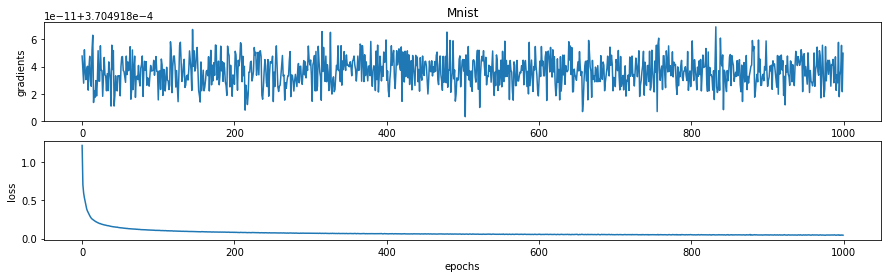

In [11]:
x1 = [i for i in range(epochs)]
plt.figure(figsize=(15,4))
plt.subplot(2,1,1)
plt.title('Mnist')
plt.plot(x1,model.gradients)
plt.ylabel('gradients')
plt.subplot(2,1,2)
plt.plot(x1,history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

In [34]:
x_train2 =  np.linspace(0.0 , 2.0 * np.pi, 1000).reshape(-1, 1) 
y_train2 =  np.sin(x_train2)

model2 = Sequential()
model2.add(Dense(5,kernel_initializer='random_normal', activation='relu', input_dim=1))
model2.add(Dense(10,kernel_initializer='random_normal', activation='relu'))
model2.add(Dense(10,kernel_initializer='random_normal', activation='relu'))
model2.add(Dense(5,kernel_initializer='random_normal', activation='relu'))
model2.add(Dense(1,kernel_initializer='random_normal', activation='linear'))

model2.gradients = []
cb = keras.callbacks.LambdaCallback(on_epoch_begin= lambda epoch,logs :get_gradients(model2,x_train2))
model2.compile(loss='mse',optimizer= 'adam',metrics=['mae'])

batch_size = 100
epochs = 1000
history2 = model2.fit(x_train2, y_train2,batch_size=batch_size,epochs=epochs,verbose=1,callbacks=[cb])



Epoch 1/1000


/home/Willie/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


1000/1000 [==============================] - 7s 7ms/step - loss: 0.4995 - mean_absolute_error: 0.6360
Epoch 2/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4995 - mean_absolute_error: 0.6360
Epoch 3/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4995 - mean_absolute_error: 0.6360
Epoch 4/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4994 - mean_absolute_error: 0.6359
Epoch 5/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4992 - mean_absolute_error: 0.6357
Epoch 6/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4987 - mean_absolute_error: 0.6353
Epoch 7/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4975 - mean_absolute_error: 0.6345
Epoch 8/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4953 - mean_absolute_error: 0.6328
Epoch 9/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4912 - mean_a

1000/1000 [==============================] - 3s 3ms/step - loss: 0.0747 - mean_absolute_error: 0.2101
Epoch 72/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0740 - mean_absolute_error: 0.2089
Epoch 73/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0732 - mean_absolute_error: 0.2066
Epoch 74/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0724 - mean_absolute_error: 0.2047
Epoch 75/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0717 - mean_absolute_error: 0.2033
Epoch 76/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0711 - mean_absolute_error: 0.2028
Epoch 77/1000
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0703 - mean_absolute_error: 0.2004
Epoch 78/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0695 - mean_absolute_error: 0.1991
Epoch 79/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0688 

1000/1000 [==============================] - 4s 4ms/step - loss: 0.0147 - mean_absolute_error: 0.0765
Epoch 142/1000
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0756
Epoch 143/1000
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0749
Epoch 144/1000
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0724
Epoch 145/1000
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0704
Epoch 146/1000
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0697
Epoch 147/1000
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0701
Epoch 148/1000
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0112 - mean_absolute_error: 0.0665
Epoch 149/1000
1000/1000 [==============================] - 4s 4ms/step - loss:

1000/1000 [==============================] - 5s 5ms/step - loss: 8.3011e-04 - mean_absolute_error: 0.0215
Epoch 211/1000
1000/1000 [==============================] - 4s 4ms/step - loss: 8.5028e-04 - mean_absolute_error: 0.0223
Epoch 212/1000
1000/1000 [==============================] - 4s 4ms/step - loss: 8.1259e-04 - mean_absolute_error: 0.0216
Epoch 213/1000
1000/1000 [==============================] - 4s 4ms/step - loss: 7.5724e-04 - mean_absolute_error: 0.0206
Epoch 214/1000
1000/1000 [==============================] - 4s 4ms/step - loss: 7.3407e-04 - mean_absolute_error: 0.0206
Epoch 215/1000
1000/1000 [==============================] - 4s 4ms/step - loss: 7.3913e-04 - mean_absolute_error: 0.0210
Epoch 216/1000
1000/1000 [==============================] - 4s 4ms/step - loss: 7.4757e-04 - mean_absolute_error: 0.0202
Epoch 217/1000
1000/1000 [==============================] - 4s 4ms/step - loss: 6.9932e-04 - mean_absolute_error: 0.0199
Epoch 218/1000
1000/1000 [=====================

1000/1000 [==============================] - 5s 5ms/step - loss: 2.5895e-04 - mean_absolute_error: 0.0125
Epoch 278/1000
1000/1000 [==============================] - 5s 5ms/step - loss: 2.6198e-04 - mean_absolute_error: 0.0123
Epoch 279/1000
1000/1000 [==============================] - 5s 5ms/step - loss: 2.6743e-04 - mean_absolute_error: 0.0126
Epoch 280/1000
1000/1000 [==============================] - 5s 5ms/step - loss: 2.6204e-04 - mean_absolute_error: 0.0125
Epoch 281/1000
1000/1000 [==============================] - 5s 5ms/step - loss: 2.6763e-04 - mean_absolute_error: 0.0125
Epoch 282/1000
1000/1000 [==============================] - 5s 5ms/step - loss: 2.6190e-04 - mean_absolute_error: 0.0124
Epoch 283/1000
1000/1000 [==============================] - 5s 5ms/step - loss: 2.5806e-04 - mean_absolute_error: 0.0122
Epoch 284/1000
1000/1000 [==============================] - 5s 5ms/step - loss: 2.7010e-04 - mean_absolute_error: 0.0127
Epoch 285/1000
1000/1000 [=====================

1000/1000 [==============================] - 5s 5ms/step - loss: 2.1505e-04 - mean_absolute_error: 0.0109
Epoch 345/1000
1000/1000 [==============================] - 5s 5ms/step - loss: 2.1513e-04 - mean_absolute_error: 0.0110
Epoch 346/1000
1000/1000 [==============================] - 5s 5ms/step - loss: 2.0829e-04 - mean_absolute_error: 0.0108
Epoch 347/1000
1000/1000 [==============================] - 5s 5ms/step - loss: 2.1719e-04 - mean_absolute_error: 0.0111
Epoch 348/1000
1000/1000 [==============================] - 6s 6ms/step - loss: 2.1129e-04 - mean_absolute_error: 0.0109
Epoch 349/1000
1000/1000 [==============================] - 5s 5ms/step - loss: 2.2246e-04 - mean_absolute_error: 0.0111
Epoch 350/1000
1000/1000 [==============================] - 6s 6ms/step - loss: 2.0728e-04 - mean_absolute_error: 0.0109
Epoch 351/1000
1000/1000 [==============================] - 5s 5ms/step - loss: 2.1897e-04 - mean_absolute_error: 0.0109
Epoch 352/1000
1000/1000 [=====================

1000/1000 [==============================] - 6s 6ms/step - loss: 2.0301e-04 - mean_absolute_error: 0.0107
Epoch 412/1000
1000/1000 [==============================] - 6s 6ms/step - loss: 1.9631e-04 - mean_absolute_error: 0.0104
Epoch 413/1000
1000/1000 [==============================] - 6s 6ms/step - loss: 2.2512e-04 - mean_absolute_error: 0.0116
Epoch 414/1000
1000/1000 [==============================] - 6s 6ms/step - loss: 2.3222e-04 - mean_absolute_error: 0.0116
Epoch 415/1000
1000/1000 [==============================] - 6s 6ms/step - loss: 2.3249e-04 - mean_absolute_error: 0.0115
Epoch 416/1000
1000/1000 [==============================] - 6s 6ms/step - loss: 1.9683e-04 - mean_absolute_error: 0.0106
Epoch 417/1000
1000/1000 [==============================] - 6s 6ms/step - loss: 1.9365e-04 - mean_absolute_error: 0.0105
Epoch 418/1000
1000/1000 [==============================] - 6s 6ms/step - loss: 2.0274e-04 - mean_absolute_error: 0.0106
Epoch 419/1000
1000/1000 [=====================

KeyboardInterrupt: 

NameError: name 'history2' is not defined

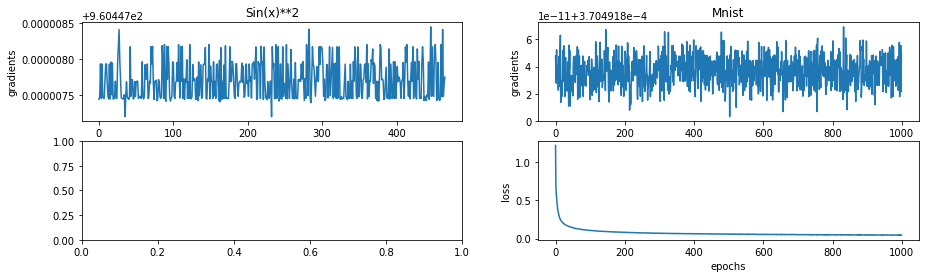

In [37]:
x1 = [i for i in range(1000)]
x2 = [i for i in range(466)]

plt.figure(figsize=(15,4))

plt.subplot(2,2,2)
plt.title('Mnist')
plt.plot(x1,model.gradients)
plt.ylabel('gradients')

plt.subplot(2,2,4)
plt.plot(x1,history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(2,2,1)
plt.title('Sin(x)**2')
plt.plot(x2,model2.gradients)
plt.ylabel('gradients')

plt.subplot(2,2,3)
plt.plot(x2,history2.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')